<a href="https://colab.research.google.com/github/Untick/Usedesk/blob/main/Vishnyakov%20Dmitry/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # массивы
import pandas as pd # таблицы
from tensorflow.keras.models import Sequential, Model # последовательная модель НС
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # основные слои
from tensorflow.keras.layers import Activation # слой задания активационной функции
from tensorflow.keras import utils # утилиты предобработки данных
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split # разделение на обучающую и проверочную\тестовую выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt # рисование графиков
%matplotlib inline

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Копия Витрина_Юздеск_2.xlsx")

In [ ]:
df0 = df1.copy()
#df0.head()
print(df1.shape)
df1.head()

(11779, 55)


,#NAME?,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,#NAME?,1,1,2023-06-01,2,3709,3442,578,2466,1231,...,0,0,0,0,2,0,0,13,1,4
1,#NAME?,1,2,2023-05-01,2,5573,5301,36,4715,2004,...,0,0,0,0,5,0,0,13,1,4
2,#NAME?,1,3,2023-04-01,2,6138,5983,4,5496,2242,...,0,0,0,0,1,0,0,13,1,4
3,#NAME?,1,4,2023-03-01,2,7834,7664,1,7094,2851,...,0,0,0,0,6,0,0,13,1,4
4,#NAME?,1,5,2023-02-01,2,7344,7252,1,6657,2686,...,0,0,0,0,2,0,0,13,1,4


In [ ]:
df_corr = df1.drop('comp_id_new', axis = 1)
df_corr = df_corr.drop('месяц_desc', axis = 1)
df_corr = df_corr.drop('дата', axis = 1)
df_corr = df_corr.corr()
df_corr.head()

<ipython-input-92-3b11c6e0afe5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_corr.corr()


,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,telephony,api,usedesk_chat,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
рейтинг,1.000000,0.077514,0.086335,0.062591,0.069261,0.076225,0.064374,0.050480,0.015082,0.062742,...,-0.018374,0.004621,NaN,0.022058,0.028223,0.026794,0.029230,0.070542,0.082710,0.058573
всего,0.077514,1.000000,0.769969,0.602674,0.836197,0.454097,0.647065,0.530440,0.691571,0.458182,...,-0.001782,-0.002966,NaN,0.030045,0.086613,0.025897,0.297219,0.270564,0.328473,0.396229
есть ответ,0.086335,0.769969,1.000000,0.496056,0.684775,0.587044,0.474847,0.429777,0.389039,0.606655,...,-0.003362,-0.003195,NaN,0.056817,0.130618,0.055578,0.253887,0.382440,0.210911,0.243454
выполнен,0.062591,0.602674,0.496056,1.000000,0.297519,0.414694,0.377139,0.154785,0.578175,0.424921,...,0.000749,-0.001909,NaN,0.010826,0.044738,0.010957,0.360577,0.058630,0.262682,0.275770
закрыт,0.069261,0.836197,0.684775,0.297519,1.000000,0.423528,0.598727,0.371628,0.524724,0.421476,...,-0.002561,-0.002635,NaN,0.037384,0.079904,0.040027,0.189644,0.357761,0.276997,0.353700


In [ ]:
df_param = df_corr[(df_corr.рейтинг > 0.05) & (df_corr.рейтинг < 1)]
display(df_param)
print(df_param.shape)

,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,telephony,api,usedesk_chat,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
всего,0.077514,1.000000,0.769969,0.602674,0.836197,0.454097,0.647065,0.530440,0.691571,0.458182,...,-0.001782,-0.002966,NaN,0.030045,0.086613,0.025897,0.297219,0.270564,0.328473,0.396229
есть ответ,0.086335,0.769969,1.000000,0.496056,0.684775,0.587044,0.474847,0.429777,0.389039,0.606655,...,-0.003362,-0.003195,NaN,0.056817,0.130618,0.055578,0.253887,0.382440,0.210911,0.243454
выполнен,0.062591,0.602674,0.496056,1.000000,0.297519,0.414694,0.377139,0.154785,0.578175,0.424921,...,0.000749,-0.001909,NaN,0.010826,0.044738,0.010957,0.360577,0.058630,0.262682,0.275770
закрыт,0.069261,0.836197,0.684775,0.297519,1.000000,0.423528,0.598727,0.371628,0.524724,0.421476,...,-0.002561,-0.002635,NaN,0.037384,0.079904,0.040027,0.189644,0.357761,0.276997,0.353700
nps,0.076225,0.454097,0.587044,0.414694,0.423528,1.000000,0.271909,0.132881,0.214618,0.574059,...,0.002329,-0.002300,NaN,0.023594,0.084995,0.072000,0.081680,0.280239,0.067559,0.095244
email,0.064374,0.647065,0.474847,0.377139,0.598727,0.271909,1.000000,0.161384,0.260204,0.112814,...,0.000450,-0.002340,NaN,0.024301,0.107539,0.014582,0.216982,0.179535,0.234168,0.273238
telephony,0.050480,0.530440,0.429777,0.154785,0.371628,0.132881,0.161384,1.000000,0.084172,0.084110,...,-0.001144,-0.001144,NaN,0.003483,0.032635,-0.006923,0.108014,0.140292,0.091598,0.136543
usedesk_chat,0.062742,0.458182,0.606655,0.424921,0.421476,0.574059,0.112814,0.084110,0.285191,1.000000,...,-0.001985,-0.001985,NaN,0.031202,0.046694,0.113223,0.086703,0.284466,0.080375,0.081238
question,0.094044,0.966319,0.737998,0.507103,0.818635,0.385626,0.687023,0.566644,0.590636,0.370452,...,-0.001665,-0.002913,NaN,0.033840,0.083257,0.029445,0.314784,0.273060,0.340527,0.405769
medium,0.078824,0.858836,0.739893,0.376179,0.741067,0.442991,0.625350,0.645076,0.316403,0.388337,...,-0.002422,-0.003187,NaN,0.037740,0.095368,0.021940,0.148613,0.340385,0.147442,0.179612


(15, 51)


In [ ]:
reit_col = df_param['рейтинг']
list_param = reit_col.index.to_list()
print(reit_col.index)
print(list_param)
print(reit_col.count())

Index(['всего', 'есть ответ', 'выполнен', 'закрыт', 'nps', 'email',
       'telephony', 'usedesk_chat', 'question', 'medium', 'правила_cnt',
       'правила_dist', 'licens', 'бз', 'бз_ст'],
      dtype='object')
['всего', 'есть ответ', 'выполнен', 'закрыт', 'nps', 'email', 'telephony', 'usedesk_chat', 'question', 'medium', 'правила_cnt', 'правила_dist', 'licens', 'бз', 'бз_ст']
15


In [ ]:
df1.loc[df1.рейтинг>0, 'рейтинг'] = 1

In [ ]:
df1.head()

,#NAME?,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,#NAME?,1,1,2023-06-01,1,3709,3442,578,2466,1231,...,0,0,0,0,2,0,0,13,1,4
1,#NAME?,1,2,2023-05-01,1,5573,5301,36,4715,2004,...,0,0,0,0,5,0,0,13,1,4
2,#NAME?,1,3,2023-04-01,1,6138,5983,4,5496,2242,...,0,0,0,0,1,0,0,13,1,4
3,#NAME?,1,4,2023-03-01,1,7834,7664,1,7094,2851,...,0,0,0,0,6,0,0,13,1,4
4,#NAME?,1,5,2023-02-01,1,7344,7252,1,6657,2686,...,0,0,0,0,2,0,0,13,1,4


In [ ]:
#print(df1.shape)
#print(df1.size)
#print(df1.info())
#print(df1.describe())
#print(df1.nunique())

In [ ]:
n = 0
for n in [list_param]:
    df_model = (df1[n])
    print(df_model.shape)
    print(df_model.head())

(11779, 15)
   всего  есть ответ  выполнен  закрыт   nps  email  telephony  usedesk_chat  \
0   3709        3442       578    2466  1231   1317          0           779   
1   5573        5301        36    4715  2004   2008          0          1248   
2   6138        5983         4    5496  2242   1991          0          1440   
3   7834        7664         1    7094  2851   2519          0          1856   
4   7344        7252         1    6657  2686   2377          0          1764   

   question  medium  правила_cnt  правила_dist  licens  бз  бз_ст  
0      3376    2568        42221            66      13   1      4  
1      5107    3735        57044            62      13   1      4  
2      5611    4114        69050            64      13   1      4  
3      7191    5313        89475            62      13   1      4  
4      6724    4894        82568            60      13   1      4  


In [ ]:
#df_model.max()
df_model.values[2].max()

69050

In [ ]:
x_data = []

for i in range(len(df_model.values)):        # Вывод значения каждого столбца
    y = df_model.values[i].max()
    x = df_model.values[i] / y
    x_data.append(x)
x_data = np.array(x_data)
print(x_data.shape)
n = 0
for i in range(len(df_model.values[n])):
    print('{:>2}  {}'.format(i, df_model.values[n][i]))
print(x_data[0,:])

(11779, 15)
 0  3709
 1  3442
 2  578
 3  2466
 4  1231
 5  1317
 6  0
 7  779
 8  3376
 9  2568
10  42221
11  66
12  13
13  1
14  4
[8.78472798e-02 8.15234125e-02 1.36898700e-02 5.84069539e-02
 2.91561072e-02 3.11930082e-02 0.00000000e+00 1.84505341e-02
 7.99602094e-02 6.08228133e-02 1.00000000e+00 1.56320315e-03
 3.07903650e-04 2.36848961e-05 9.47395846e-05]


In [ ]:
#list_reit = [0,1,2,3]
#y_data = utils.to_categorical(df1['рейтинг'], 4)
#y_data = np.array(y_data)
print(y_data[0,])

1


In [ ]:
x_data = np.array(x_data)
y_data = np.array(df1['рейтинг'])
print(x_data[0,:])
print(y_data[0,])

[8.78472798e-02 8.15234125e-02 1.36898700e-02 5.84069539e-02
 2.91561072e-02 3.11930082e-02 0.00000000e+00 1.84505341e-02
 7.99602094e-02 6.08228133e-02 1.00000000e+00 1.56320315e-03
 3.07903650e-04 2.36848961e-05 9.47395846e-05]
1


In [ ]:
#Функция отрисовки графика
def plot_hst(history):
    plt.plot(history.history['accuracy'],
            label = 'Accuracy')
    plt.plot(history.history['val_accuracy'],
             label = 'Val_accuracy')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

Epoch 1/30
189/189 [==============================] - 6s 23ms/step - loss: 0.1644 - accuracy: 0.7982 - val_loss: 0.1880 - val_accuracy: 0.8247
Epoch 2/30
189/189 [==============================] - 4s 22ms/step - loss: 0.1358 - accuracy: 0.8227 - val_loss: 0.1423 - val_accuracy: 0.8357
Epoch 3/30
189/189 [==============================] - 3s 18ms/step - loss: 0.1318 - accuracy: 0.8271 - val_loss: 0.1392 - val_accuracy: 0.8234
Epoch 4/30
189/189 [==============================] - 3s 18ms/step - loss: 0.1210 - accuracy: 0.8412 - val_loss: 0.1564 - val_accuracy: 0.7857
Epoch 5/30
189/189 [==============================] - 5s 26ms/step - loss: 0.1186 - accuracy: 0.8410 - val_loss: 0.1622 - val_accuracy: 0.7984
Epoch 6/30
189/189 [==============================] - 4s 22ms/step - loss: 0.1110 - accuracy: 0.8552 - val_loss: 0.1314 - val_accuracy: 0.8349
Epoch 7/30
189/189 [==============================] - 3s 18ms/step - loss: 0.1093 - accuracy: 0.8548 - val_loss: 0.1482 - val_accuracy: 0.8234

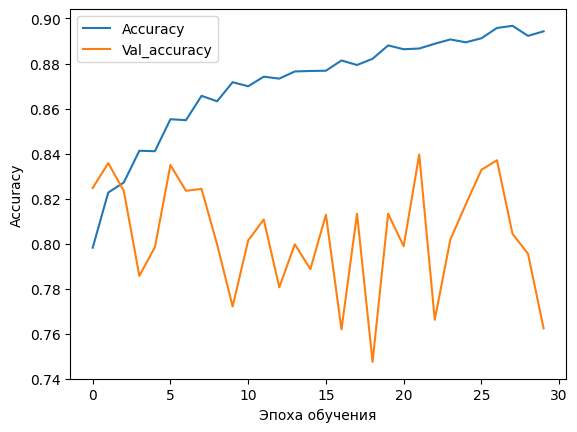

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_dim=x_data.shape[1]))
model. add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model. add(Dense(700, activation='relu'))
model. add(Dense(300, activation='linear'))
#model.add(Dropout(0.1))
model. add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['accuracy'])

history = model.fit(x_data, y_data, epochs=30, batch_size=50, validation_split=0.2, verbose=1)

plot_hst(history)

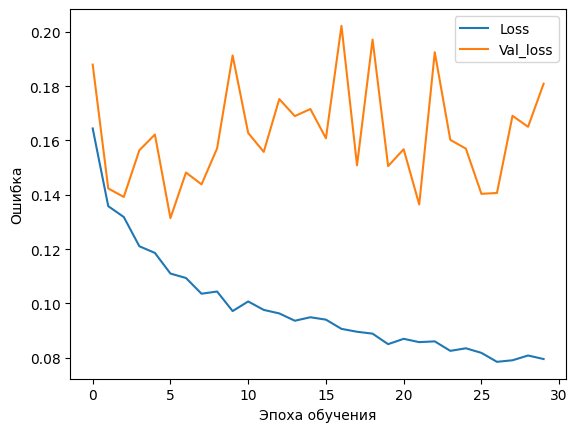

In [ ]:
    plt.plot(history.history['loss'],
            label = 'Loss')
    plt.plot(history.history['val_loss'],
             label = 'Val_loss')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()

    plt.show()